In [1]:
import pandas as pd
import numpy as np
import sys
import os
import importlib

sys.path.append(os.path.abspath(".."))

import src.utils.eda as eda
import src.utils.create_meta_features as cmf

In [16]:
# l1_tr_df1
importlib.reload(cmf)
tr_df, test_df = cmf.create_meta_features([5], "base", scale=False)
tr_df.to_parquet("../artifacts/features/l1/l1_tr_df1.parquet", index=False)
test_df.to_parquet("../artifacts/features/l1/l1_test_df1.parquet", index=False)

In [17]:
# l1_tr_df3
importlib.reload(cmf)
tr_df, test_df = cmf.create_meta_features([5, 1], "base", scale=False)
tr_df.to_parquet("../artifacts/features/l1/l1_tr_df3.parquet", index=False)
test_df.to_parquet("../artifacts/features/l1/l1_test_df3.parquet", index=False)

In [18]:
# l1_tr_df2
tr_df, test_df = cmf.create_meta_features([10], "base", scale=True)
tr_df.to_parquet("../artifacts/features/l1/l1_tr_df2.parquet", index=False)
test_df.to_parquet("../artifacts/features/l1/l1_test_df2.parquet", index=False)

In [19]:
# l1_tr_df4
tr_df, test_df = cmf.create_meta_features([10, 1], "base", scale=True)
tr_df.to_parquet("../artifacts/features/l1/l1_tr_df4.parquet", index=False)
test_df.to_parquet("../artifacts/features/l1/l1_test_df4.parquet", index=False)

(750000,)
(750000,)
(750000,)
(750000,)
(750000,)
(750000,)


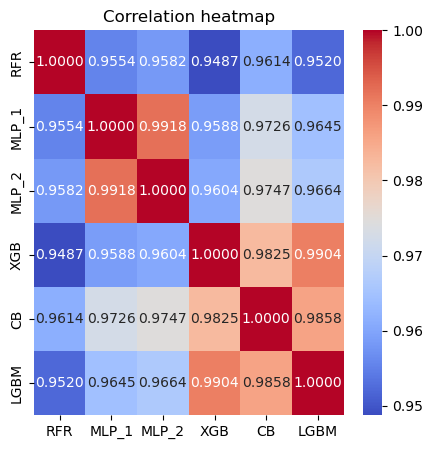

In [10]:
# Check correlation between prediction outputs
importlib.reload(eda)
# RFR, MLP, MLP, XGB, CB, LGBM
oof1 = np.load("../artifacts/preds/base/oof_single_1.npy")
oof5 = np.load("../artifacts/preds/base/oof_single_5.npy")
oof8 = np.load("../artifacts/preds/base/oof_single_8.npy")
oof10 = np.load("../artifacts/preds/base/oof_single_10.npy")
oof13 = np.load("../artifacts/preds/base/oof_single_13.npy")
oof16 = np.load("../artifacts/preds/base/oof_single_16.npy")

oof_list = [oof1[:, 1].flatten(), oof5, oof8, oof10, oof13[:, 1].flatten(), oof16]

for oof in oof_list:
    print(oof.shape)

residual_array = np.stack(oof_list, axis=1)

residual_df = pd.DataFrame(
    residual_array,
    columns=["RFR", "MLP_1", "MLP_2", "XGB", "CB", "LGBM"])

eda.show_corr_heatmap(residual_df)